https://leetcode.com/problems/longest-substring-without-repeating-characters/description/

In [71]:
import time

import numpy as np
import matplotlib.pyplot as plt

In [43]:
all_chars = list('abcdefghijklmnopqrstuvwxyz')

In [54]:
def gen_str(length):
    return ''.join(np.random.choice(all_chars, length))

#### Naive Solution
$Time: O(n^3)$ <br>
$Space: O(n)$

In [63]:
def solution1(string):
    start = time.time()
    max_substring = ''
    for i, ci in enumerate(string):
        buffer = ci
        for j, cj in enumerate(string[i + 1:]):
            j += i + 1
            if cj in buffer:
                break
            else:
                buffer += cj
        if len(buffer) > len(max_substring):
            max_substring = buffer
    return max_substring, time.time() - start

In [110]:
string0 = 'abcabcbb'
string1 = 'bbbbb'
string2 = 'pwwkew'
for string in ('abcabcbb', 'bbbbb', 'pwwkew'):
    print(solution1(string))

('abc', 1.71661376953125e-05)
('b', 7.867813110351562e-06)
('wke', 1.0967254638671875e-05)


#### Sliding window
$Time: O(n)$ <br>
$Space: O(n)$

Скользим окном некоторой ширины, если ширину можно увеличивать - увеличиваем и скользим дальше

In [126]:
def solution2(string):
    start = time.time()
    max_substring = string[0]
    i, j = 0, 1
    n = len(string)
    while i < n and j < n:
        window = string[i:j]
        chars = set(window)
        if len(window) > len(chars):
            i += 1
            j += 1
        else:
            j += 1
            if len(max_substring) < len(window):
                max_substring = window
    return max_substring, time.time() - start


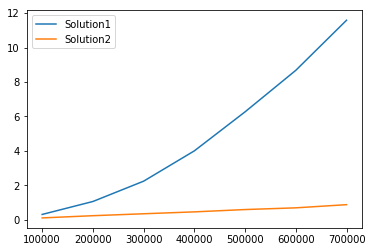

In [121]:
lengths = (100000, 200000, 300000, 400000, 500000, 600000, 700000)
times1 = [solution1(gen_str(length))[1] for length in lengths]
times2 = [solution2(gen_str(length))[1] for length in lengths]
plt.plot(lengths, times1)
plt.plot(lengths, times2)
plt.legend(['Solution1', 'Solution2'])
plt.show()

In [127]:
solution2('c')

('c', 1.1920928955078125e-06)

In [125]:
['c'][0:1]

['c']